In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [23]:
df = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [24]:
# Drop ID column
df.drop(columns=['ID#'], inplace=True)

# Remove outliers using Z-score
df = df[(abs(zscore(df)) < 3).all(axis=1)]

# Scale features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

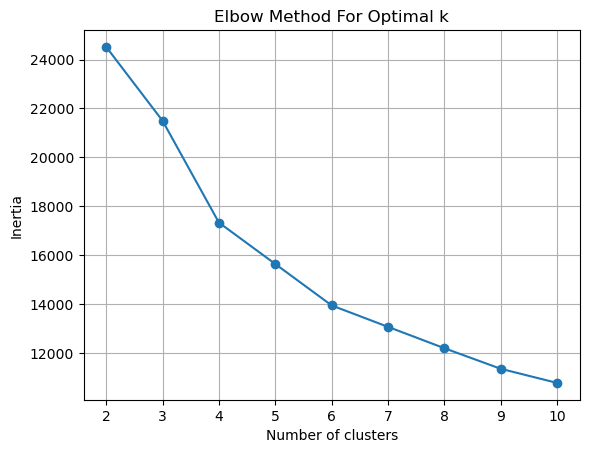

KMeans Silhouette Score: 0.24459005478828733


In [25]:
# Elbow Method to determine optimal k
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Final KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
print("KMeans Silhouette Score:", silhouette_score(scaled_data, kmeans_labels))


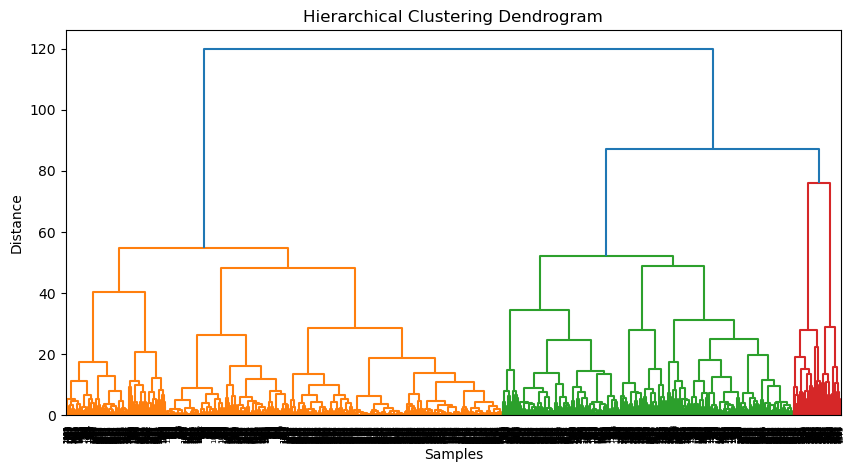

Hierarchical Clustering Silhouette Score: 0.2460121369225858


In [26]:
# Plot Dendrogram
plt.figure(figsize=(10, 5))
link = linkage(scaled_data, method='ward')
dendrogram(link)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=5)
hc_labels = hc.fit_predict(scaled_data)
print("Hierarchical Clustering Silhouette Score:", silhouette_score(scaled_data, hc_labels))


In [27]:
# Apply DBSCAN
db = DBSCAN(eps=1.8, min_samples=5)
db_labels = db.fit_predict(scaled_data)

# Handle silhouette score with caution for DBSCAN
if len(set(db_labels)) > 1 and -1 not in db_labels:
    print("DBSCAN Silhouette Score:", silhouette_score(scaled_data, db_labels))
else:
    print("DBSCAN Silhouette Score: Not valid (only 1 cluster or contains noise)")


DBSCAN Silhouette Score: Not valid (only 1 cluster or contains noise)


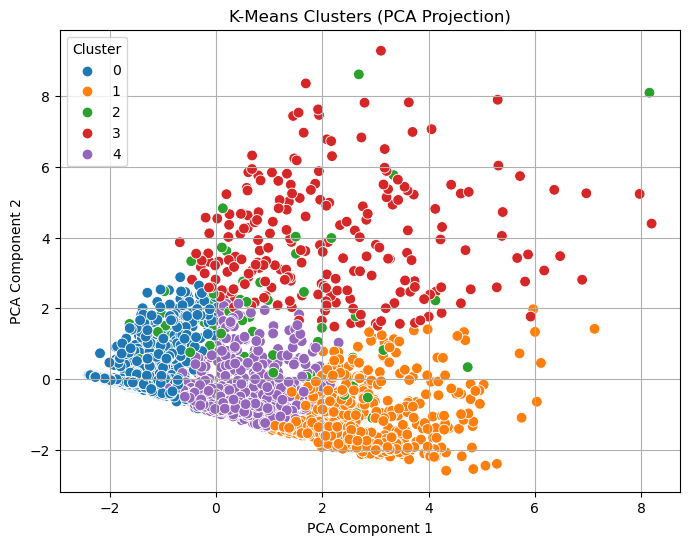

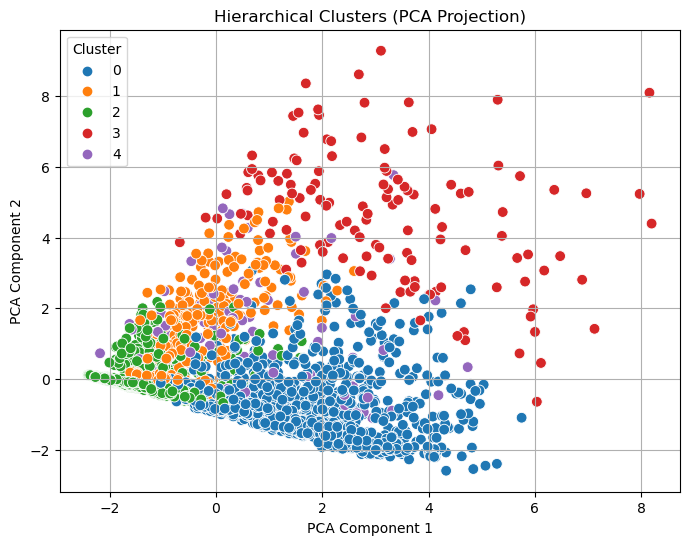

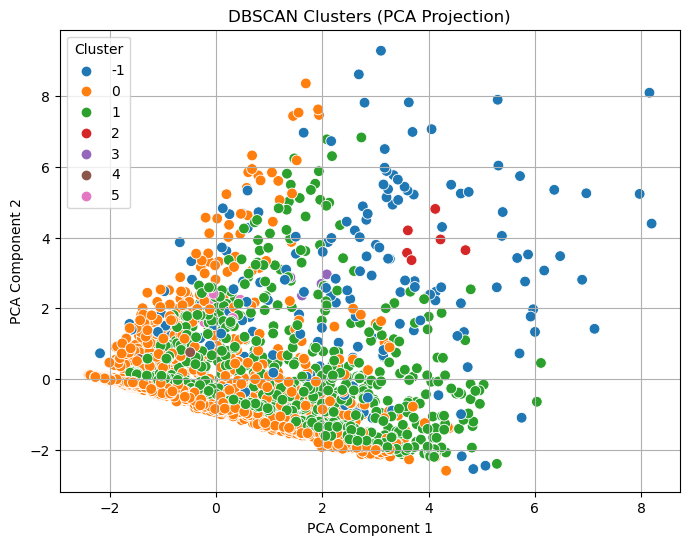

In [28]:
# Reduce dimensions to 2D for plotting
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

def plot_clusters(labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette='tab10', s=60)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()

# Plot all clustering results
plot_clusters(kmeans_labels, "K-Means Clusters (PCA Projection)")
plot_clusters(hc_labels, "Hierarchical Clusters (PCA Projection)")
plot_clusters(db_labels, "DBSCAN Clusters (PCA Projection)")


In [39]:
df['KMeans_Cluster'] = kmeans_labels
kmeans_summary = df.groupby('KMeans_Cluster').mean()
display(kmeans_summary)


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,HC_Cluster,DBSCAN_Cluster
KMeans_Cluster,,,,,,,,,,,,,
0,29423.840692,3.621122,1.022076,1.0,1.0,2149.324582,3.987470,89.902745,0.321002,3469.643795,0.131862,1.812053,0.133652
1,113457.951987,10.365894,4.238411,1.0,1.0,46588.049669,18.395695,207.736755,0.660596,5042.173841,0.650662,0.071192,0.594371
2,79135.057143,1636.771429,1.842857,1.0,1.0,14477.314286,10.900000,482.100000,1.585714,4325.414286,0.628571,3.971429,-0.371429
3,92203.364444,53.262222,1.946667,1.0,1.0,17952.208889,15.800000,2272.057778,6.320000,4260.968889,0.617778,1.977778,0.097778
4,71618.221801,4.553555,2.284360,1.0,1.0,14324.091943,15.045498,102.212322,0.360190,4381.286256,0.415166,0.549763,0.404739


In [43]:
df['HC_Cluster'] = hc_labels
hc_summary = df.groupby('HC_Cluster').mean()
display(hc_summary)


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,DBSCAN_Cluster
HC_Cluster,,,,,,,,,,,,,
0,94359.397652,1.467351,3.333089,1.0,1.0,29713.872340,16.449010,168.036684,0.515040,4555.509171,0.526045,2.593544,0.506970
1,47532.379828,1.072961,1.081545,1.0,1.0,5069.648069,5.778970,509.566524,1.581545,4232.319742,0.802575,1.474249,0.809013
2,29755.190627,0.000000,1.094997,1.0,1.0,2732.722609,6.000633,49.088030,0.183027,3580.542115,0.000000,0.549082,0.000000
3,115439.441860,98.062016,2.341085,1.0,1.0,26393.124031,18.891473,2671.232558,7.751938,3980.527132,0.705426,2.844961,-0.263566
4,75788.311828,1382.172043,1.849462,1.0,1.0,14235.268817,10.322581,433.903226,1.311828,4255.548387,0.569892,1.967742,-0.301075


In [42]:
df['DBSCAN_Cluster'] = db_labels
df[df['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean()
display(dbscan_summary)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster,HC_Cluster
DBSCAN_Cluster,,,,,,,,,,,,,
0,54160.485985,0.000000,1.672273,1.0,1.0,9236.368262,8.563174,133.699439,0.419577,3805.605865,0.0,1.211729,1.429064
1,63990.974752,0.000000,2.604148,1.0,1.0,23042.372408,13.266907,295.382326,0.943192,4514.106402,1.0,2.117223,0.410280
2,75582.000000,0.000000,3.000000,1.0,1.0,29681.000000,28.000000,2526.166667,7.333333,5830.000000,1.0,3.000000,3.000000
3,75982.250000,0.000000,2.250000,1.0,1.0,11341.000000,19.750000,1662.500000,5.500000,7256.500000,0.0,3.000000,0.500000
4,60329.857143,884.571429,1.000000,1.0,1.0,2496.571429,4.285714,7.142857,0.142857,3886.000000,0.0,1.142857,4.000000
5,59674.000000,883.400000,1.000000,1.0,1.0,5590.600000,5.200000,787.400000,2.200000,3871.000000,1.0,2.400000,4.000000


In [ ]:
K-Means often gives clear and balanced segments, ideal for marketing segmentation.
Hierarchical gives a flexible tree-like structure and can reveal nested customer segments.
DBSCAN identifies core users vs. noise/outliers, useful for detecting anomalies or special cases.